In [1]:
import pandas as pd
import numpy as np

In [2]:
listing_df = pd.read_csv("airbnb_listing_from_2018.csv")
listing_df.head()

/var/folders/lx/wx3109f56_50_r0_22hgbcjr0000gn/T/ipykernel_62360/1149885320.py:1: DtypeWarning: Columns (4,12,19,20,21,32) have mixed types. Specify dtype option on import or set low_memory=False.
  listing_df = pd.read_csv("airbnb_listing_from_2018.csv")


,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,year,month,file_name
0,109,521,within an hour,100%,NaN,1.0,1.0,['email'; 'phone'; 'facebook'; 'amex'; 'review...,t,t,...,10.0,8.0,strict,0.03,NaN,NaN,NaN,2018,3,los_angeles_2018_03_listings.csv.gz
1,344,767,NaN,NaN,NaN,1.0,1.0,['email'; 'phone'; 'reviews'; 'jumio'; 'kba'],t,t,...,10.0,8.0,flexible,0.05,NaN,NaN,NaN,2018,3,los_angeles_2018_03_listings.csv.gz
2,2404,2633,NaN,NaN,NaN,1.0,1.0,['email'],f,f,...,NaN,NaN,moderate,NaN,NaN,NaN,NaN,2018,3,los_angeles_2018_03_listings.csv.gz
3,2732,3041,within an hour,100%,NaN,2.0,2.0,['email'; 'phone'; 'reviews'],t,f,...,10.0,9.0,strict,0.21,NaN,NaN,NaN,2018,3,los_angeles_2018_03_listings.csv.gz
4,2864,3207,within an hour,100%,NaN,2.0,2.0,['email'; 'phone'; 'facebook'; 'kba'],t,t,...,NaN,NaN,strict,NaN,NaN,NaN,NaN,2018,3,los_angeles_2018_03_listings.csv.gz


In [3]:
listing_df.dtypes

id                                                int64
host_id                                           int64
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_listings_count                             float64
host_total_listings_count                       float64
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood                                    object
neighbourhood_cleansed                           object
zipcode                                          object
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [4]:
listing_df.columns

Index(['id', 'host_id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'zipcode', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'cleaning_fee', 'minimum_nights', 'has_availability',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'cancellation_policy', 'reviews_per_month',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'year', 'month',
       'file_name'],
      dtype='object')

In [5]:
listing_df.drop(["cancellation_policy","amenities","file_name"],axis=1,inplace=True)

In [6]:
def booleanization(x):
    if x == 't':
        return 1
    if x == 'f':
        return 0
    return x

In [7]:
def removeDollar(x):
    if str(x) == 'nan':
        return np.nan
    if type(x) == str:
        try:
            s = x.split("$")[1]
            s = s.replace(';','')
            return float(s)
        except:
            print(x)
            return x

In [8]:
listing_df["has_availability"] = listing_df.apply(lambda x: booleanization(x["has_availability"]),axis=1)

In [9]:
listing_df["host_identity_verified"] = listing_df.apply(lambda x: booleanization(x["host_identity_verified"]),axis=1)

In [10]:
listing_df["host_has_profile_pic"] = listing_df.apply(lambda x: booleanization(x["host_has_profile_pic"]),axis=1)

In [11]:
listing_df["cleaning_fee"] = listing_df.apply(lambda x: removeDollar(x["cleaning_fee"]),axis=1)

In [12]:
listing_df["price"] = listing_df.apply(lambda x: removeDollar(x["price"]),axis=1)

In [13]:
def contains(x,y):
    if str(x) == 'nan':
        return x
    x = x.upper()
    y = y.upper()
    if y in x:
        return 1
    else:
        return 0

In [14]:
property_indexing_list = list(listing_df["property_type"].value_counts().head(15).index)

In [15]:
property_indexing_list = [x.upper() for x in property_indexing_list]

In [16]:
listing_df["is_private"] = listing_df.apply(lambda x: contains(x["property_type"],"private"),axis=1)

In [17]:
listing_df["is_entire"] = listing_df.apply(lambda x: contains(x["property_type"],"entire"),axis=1)

In [18]:
def makeUpperCase(x):
    if str(x) == 'nan':
        return x
    return x.upper()

In [19]:
listing_df["property_type"] = listing_df.apply(lambda x: makeUpperCase(x["property_type"]),axis=1)

In [20]:
def setProperty_type(x):
    if str(x) == 'nan':
        return x
    if x in property_indexing_list:
        if contains(x,"apartment") == 1:
            return "Apartment".upper()
        if contains(x,"house") == 1:
            return "House".upper()
        if contains(x,"guesthouse") == 1:
            return "Guesthouse".upper()
        return x
    else:
        return "Others"

In [21]:
listing_df["property_type"] = listing_df.apply(lambda x: setProperty_type(x["property_type"]),axis=1)

In [22]:
listing_df["property_type"].value_counts()

HOUSE          584829
APARTMENT      513547
Others         104424
CONDOMINIUM     64857
GUEST SUITE     38821
BUNGALOW        32353
VILLA           25475
LOFT            25200
Name: property_type, dtype: int64

In [23]:
host_verifications_set = set([])
for i in listing_df["host_verifications"]:
    if i == "NA":
        host_verifications_set.add("NA")
        continue
    i = i.replace("[","")
    i = i.replace("]","")
    for j in i.split(";"):
        host_verifications_set.add(j.replace("'","").replace(" ",""))
host_verifications_list = list(host_verifications_set.difference(set([''])))
host_verifications_list

['photographer',
 'email',
 'work_email',
 'offline_government_id',
 'sesame_offline',
 'kba',
 'jumio',
 'manual_online',
 'government_id',
 'weibo',
 'manual_offline',
 'None',
 'selfie',
 'sent_id',
 'identity_manual',
 'facebook',
 'amex',
 'zhima_selfie',
 'phone',
 'linkedin',
 'google',
 'reviews',
 'sesame']

In [24]:
j = 0
for i in host_verifications_list:
    listing_df["host_ver_"+i] = listing_df.apply(lambda x: contains(x["host_verifications"],"'"+i+"'"),axis=1)
    print(j,end="\r")
    j = j + 1

In [25]:
def removePerc(x):
    if str(x) == 'nan':
        return np.nan
    if type(x) == str:
        try:
            s = x.split("%")[0]
            s = s.replace(';','')
            return float(s)
        except:
            print(x)
            return x

In [26]:
listing_df["host_acceptance_rate"] = listing_df.apply(lambda x: removePerc(x["host_acceptance_rate"]),axis=1)

In [27]:
listing_df["host_response_rate"] = listing_df.apply(lambda x: removePerc(x["host_response_rate"]),axis=1)

In [28]:
listing_df_dec_2020 = listing_df.loc[(listing_df["year"] == 2020) & (listing_df['month'] == 12)]

In [29]:
listing_df_dec_2020.shape

(31845, 62)

In [30]:
for i in listing_df_dec_2020:
    if sum(listing_df_dec_2020[i].astype(str) == 'nan') != 0 :
        print(i,sum(listing_df_dec_2020[i].astype(str) == 'nan') / listing_df_dec_2020.shape[0])

host_response_time 0.290814884597268
host_response_rate 0.290814884597268
host_acceptance_rate 0.22703721149317005
host_listings_count 0.006657246035484377
host_total_listings_count 0.006657246035484377
host_has_profile_pic 0.006657246035484377
host_identity_verified 0.006657246035484377
neighbourhood 0.3561312607944732
zipcode 1.0
bathrooms 1.0
bedrooms 0.1141466478254043
beds 0.011116344795101272
cleaning_fee 1.0
review_scores_rating 0.24440257497252316
review_scores_accuracy 0.2496153242267232
review_scores_cleanliness 0.2496153242267232
review_scores_checkin 0.24992934526613284
review_scores_communication 0.24970953053854608
review_scores_location 0.25002355157795575
review_scores_value 0.25014915999371956
reviews_per_month 0.23268959020254357


In [31]:
listing_df["host_listings_count"].fillna(0,inplace=True)
listing_df["host_total_listings_count"].fillna(0,inplace=True)
listing_df["host_has_profile_pic"].fillna(0,inplace=True)
listing_df["host_identity_verified"].fillna(0,inplace=True)
listing_df["reviews_per_month"].fillna(0,inplace=True)
listing_df["host_response_time"].fillna("Not Specified",inplace=True)
listing_df["host_response_rate"].fillna(0,inplace=True)
listing_df["calculated_host_listings_count_entire_homes"].fillna(0,inplace=True)
listing_df["calculated_host_listings_count_private_rooms"].fillna(0,inplace=True)
listing_df["calculated_host_listings_count_shared_rooms"].fillna(0,inplace=True)
listing_df["beds"].fillna(1,inplace=True)
listing_df["minimum_nights"].fillna(1,inplace=True)
listing_df["host_acceptance_rate"].fillna(0,inplace=True)

In [32]:
listing_df_dec_2020 = listing_df.loc[(listing_df["year"] == 2020) & (listing_df['month'] == 12)]
for i in listing_df_dec_2020:
    if sum(listing_df_dec_2020[i].astype(str) == 'nan') != 0 :
        print(i,sum(listing_df_dec_2020[i].astype(str) == 'nan') / listing_df_dec_2020.shape[0])

neighbourhood 0.3561312607944732
zipcode 1.0
bathrooms 1.0
bedrooms 0.1141466478254043
cleaning_fee 1.0
review_scores_rating 0.24440257497252316
review_scores_accuracy 0.2496153242267232
review_scores_cleanliness 0.2496153242267232
review_scores_checkin 0.24992934526613284
review_scores_communication 0.24970953053854608
review_scores_location 0.25002355157795575
review_scores_value 0.25014915999371956


In [33]:
listing_df["host_acceptance_rate"].median()

0.0

In [34]:
listing_df["review_scores_rating"].value_counts()

100.0    311402
98.0     103937
97.0      85037
99.0      84496
96.0      76299
          ...  
44.0          3
35.0          2
32.0          1
36.0          1
28.0          1
Name: review_scores_rating, Length: 68, dtype: int64

In [35]:
# completely remove bathrooms column,bedrooms, cleaning fee, all review_scores except review_scores_rating
listing_df.drop(["bathrooms","bedrooms","cleaning_fee",\
                 "review_scores_accuracy","review_scores_cleanliness",\
                    "review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value"],axis=1,inplace=True)

In [36]:
listing_df["host_response_time"].value_counts()

within an hour        753382
Not Specified         324652
within a few hours    177678
within a day          101614
a few days or more     32180
Name: host_response_time, dtype: int64

In [37]:
listing_df.shape

(1389506, 53)

In [38]:
listing_df.drop(["host_verifications","zipcode","neighbourhood"],inplace=True,axis=1)

In [39]:
listing_df.dtypes.head(60)

id                                                int64
host_id                                           int64
host_response_time                               object
host_response_rate                              float64
host_acceptance_rate                            float64
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                            float64
host_identity_verified                          float64
neighbourhood_cleansed                           object
property_type                                    object
room_type                                        object
accommodates                                      int64
beds                                            float64
price                                           float64
minimum_nights                                  float64
has_availability                                  int64
number_of_reviews                               

In [40]:
avg_rating_nc_df = pd.DataFrame(listing_df.groupby(by=["neighbourhood_cleansed"])["review_scores_rating"].mean())
avg_rating_nc_df.columns = ["avg_rating_nc"]
avg_price_nc_df = pd.DataFrame(listing_df.groupby(by=["neighbourhood_cleansed"])["price"].mean())
avg_price_nc_df.columns = ["avg_price_nc"]
num_prop_nc_df = pd.DataFrame(listing_df.groupby(by=["neighbourhood_cleansed"])["id"].count())
num_prop_nc_df.columns = ["num_prop_nc"]
avg_rating_host_df = pd.DataFrame(listing_df.groupby(by=["host_id"])["review_scores_rating"].count())
avg_rating_host_df.columns = ["avg_rating_host"]

In [41]:
df = pd.DataFrame()
df = pd.merge(left=listing_df,right=avg_rating_nc_df,on=["neighbourhood_cleansed"],how="left")
df = pd.merge(left=df,right=avg_price_nc_df,on=["neighbourhood_cleansed"],how="left")
df = pd.merge(left=df,right=num_prop_nc_df,on=["neighbourhood_cleansed"],how="left")
df = pd.merge(left=df,right=avg_rating_host_df,on=["host_id"],how="left")
df.head()

,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,host_ver_zhima_selfie,host_ver_phone,host_ver_linkedin,host_ver_google,host_ver_reviews,host_ver_sesame,avg_rating_nc,avg_price_nc,num_prop_nc,avg_rating_host
0,109,521,within an hour,100.0,0.0,1.0,1.0,1.0,1.0,Culver City,...,0,1,0,0,1,0,95.917083,150.255282,10774,35
1,344,767,Not Specified,0.0,0.0,1.0,1.0,1.0,1.0,Burbank,...,0,1,0,0,1,0,95.972392,131.482938,12811,31
2,2404,2633,Not Specified,0.0,0.0,1.0,1.0,0.0,0.0,Del Rey,...,0,0,0,0,0,0,95.001198,145.166596,11481,0
3,2732,3041,within an hour,100.0,0.0,2.0,2.0,1.0,0.0,Santa Monica,...,0,1,0,0,1,0,95.270356,202.354179,38082,70
4,2864,3207,within an hour,100.0,0.0,2.0,2.0,1.0,1.0,Bellflower,...,0,1,0,0,0,0,95.736306,89.729862,1053,0


In [42]:
def replace_review_score(x,y):
    if str(x) == 'nan' and y != 0:
        return y
    return x

In [43]:
df["review_scores_rating"] = df.apply(lambda x: replace_review_score(x["review_scores_rating"],x["avg_rating_host"]),axis=1)
df.head()

,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,host_ver_zhima_selfie,host_ver_phone,host_ver_linkedin,host_ver_google,host_ver_reviews,host_ver_sesame,avg_rating_nc,avg_price_nc,num_prop_nc,avg_rating_host
0,109,521,within an hour,100.0,0.0,1.0,1.0,1.0,1.0,Culver City,...,0,1,0,0,1,0,95.917083,150.255282,10774,35
1,344,767,Not Specified,0.0,0.0,1.0,1.0,1.0,1.0,Burbank,...,0,1,0,0,1,0,95.972392,131.482938,12811,31
2,2404,2633,Not Specified,0.0,0.0,1.0,1.0,0.0,0.0,Del Rey,...,0,0,0,0,0,0,95.001198,145.166596,11481,0
3,2732,3041,within an hour,100.0,0.0,2.0,2.0,1.0,0.0,Santa Monica,...,0,1,0,0,1,0,95.270356,202.354179,38082,70
4,2864,3207,within an hour,100.0,0.0,2.0,2.0,1.0,1.0,Bellflower,...,0,1,0,0,0,0,95.736306,89.729862,1053,0


In [44]:
listing_df_dec_2020 = df.loc[(df["year"] == 2020) & (df['month'] == 12)]
for i in listing_df_dec_2020:
    if sum(listing_df_dec_2020[i].astype(str) == 'nan') != 0 :
        print(i,sum(listing_df_dec_2020[i].astype(str) == 'nan') / listing_df_dec_2020.shape[0])

review_scores_rating 0.12422672319045376
avg_rating_nc 3.1402103940964046e-05


In [45]:
listing_df_dec_2020["avg_rating_nc"].fillna(0)

1325486    95.917083
1325487    92.601125
1325488    95.270356
1325489    95.736306
1325490    95.001198
             ...    
1357326    93.088390
1357327    93.088390
1357328    93.268559
1357329    95.460022
1357330    94.163524
Name: avg_rating_nc, Length: 31845, dtype: float64

In [46]:
listing_df_dec_2020 = listing_df_dec_2020.loc[~listing_df_dec_2020["review_scores_rating"].isna()]

In [47]:
for i in listing_df_dec_2020:
    if sum(listing_df_dec_2020[i].astype(str) == 'nan') != 0 :
        print(i,sum(listing_df_dec_2020[i].astype(str) == 'nan') / listing_df_dec_2020.shape[0])

In [48]:
listing_df_dec_2020.head()

,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,host_ver_zhima_selfie,host_ver_phone,host_ver_linkedin,host_ver_google,host_ver_reviews,host_ver_sesame,avg_rating_nc,avg_price_nc,num_prop_nc,avg_rating_host
1325486,109,521,Not Specified,0.0,0.0,1.0,1.0,1.0,1.0,Culver City,...,0,1,0,0,1,0,95.917083,150.255282,10774,35
1325487,2708,3008,within an hour,100.0,100.0,2.0,2.0,1.0,1.0,Hollywood,...,0,1,0,0,1,0,92.601125,159.353636,81026,61
1325488,2732,3041,within a few hours,90.0,47.0,2.0,2.0,1.0,1.0,Santa Monica,...,0,1,0,0,1,0,95.270356,202.354179,38082,70
1325490,5728,9171,within a few hours,100.0,91.0,8.0,8.0,1.0,1.0,Del Rey,...,0,1,0,0,1,0,95.001198,145.166596,11481,139
1325491,5729,9171,within a few hours,100.0,91.0,8.0,8.0,1.0,1.0,Del Rey,...,0,1,0,0,1,0,95.001198,145.166596,11481,139


In [49]:
df_temp = pd.get_dummies(listing_df_dec_2020["host_response_time"],drop_first=True)
df_temp.head()

,a few days or more,within a day,within a few hours,within an hour
1325486,0,0,0,0
1325487,0,0,0,1
1325488,0,0,1,0
1325490,0,0,1,0
1325491,0,0,1,0


In [50]:
listing_df_dec_2020 = pd.concat([listing_df_dec_2020,df_temp],axis=1)

In [51]:
df_temp = pd.get_dummies(listing_df_dec_2020["property_type"],drop_first=True)
df_temp.head()

,HOUSE,Others
1325486,0,1
1325487,0,0
1325488,0,0
1325490,0,1
1325491,0,1


In [52]:
listing_df_dec_2020 = pd.concat([listing_df_dec_2020,df_temp],axis=1)

In [53]:
df_temp = pd.get_dummies(listing_df_dec_2020["room_type"],drop_first=True)
df_temp.head()

,Hotel room,Private room,Shared room
1325486,0,0,0
1325487,0,1,0
1325488,0,1,0
1325490,0,1,0
1325491,0,1,0


In [54]:
listing_df_dec_2020 = pd.concat([listing_df_dec_2020,df_temp],axis=1)

In [55]:
listing_df_dec_2020.columns

Index(['id', 'host_id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'beds', 'price', 'minimum_nights',
       'has_availability', 'number_of_reviews', 'review_scores_rating',
       'reviews_per_month', 'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'year', 'month',
       'is_private', 'is_entire', 'host_ver_photographer', 'host_ver_email',
       'host_ver_work_email', 'host_ver_offline_government_id',
       'host_ver_sesame_offline', 'host_ver_kba', 'host_ver_jumio',
       'host_ver_manual_online', 'host_ver_government_id', 'host_ver_weibo',
       'host_ver_manual_offline', 'host_ver_None', 'host_ver_selfie',
       'host_ver_sent_id', 'host_ver_ident

In [56]:
listing_df_dec_2020.shape

(27889, 63)

In [57]:
listing_df_dec_2020.drop(["host_id","neighbourhood_cleansed","host_response_time","property_type","room_type"],axis=1,inplace=True)

In [58]:
listing_df_dec_2020.dtypes

id                                                int64
host_response_rate                              float64
host_acceptance_rate                            float64
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                            float64
host_identity_verified                          float64
accommodates                                      int64
beds                                            float64
price                                           float64
minimum_nights                                  float64
has_availability                                  int64
number_of_reviews                                 int64
review_scores_rating                            float64
reviews_per_month                               float64
calculated_host_listings_count_entire_homes     float64
calculated_host_listings_count_private_rooms    float64
calculated_host_listings_count_shared_rooms     

In [59]:
calendar_df = pd.read_csv("airbnb_calendar_from_2019_to_2020.csv")
calendar_df.head()

,listing_id,date,available,price,year,month
0,109,2019-01-12,False,$118.00,2019,1
1,109,2019-01-13,False,$118.00,2019,1
2,109,2019-01-14,False,$118.00,2019,1
3,109,2019-01-15,False,$118.00,2019,1
4,109,2019-01-16,False,$118.00,2019,1


In [60]:
calendar_df = calendar_df[["listing_id","year","month","available"]]
calendar_df.head()

,listing_id,year,month,available
0,109,2019,1,False
1,109,2019,1,False
2,109,2019,1,False
3,109,2019,1,False
4,109,2019,1,False


In [61]:
available_df = calendar_df.groupby(by=["listing_id","year","month"],as_index=False)["available"].sum()
available_df.head()

,listing_id,year,month,available
0,109,2019,1,0
1,109,2019,2,0
2,109,2019,3,0
3,109,2019,4,0
4,109,2019,5,0


In [62]:
avg_available_df = available_df.groupby("listing_id",as_index=False)["available"].mean()
avg_available_df

,listing_id,available
0,109,0.000000
1,344,1.285714
2,2708,6.125000
3,2732,16.458333
4,2864,0.958333
...,...,...
89617,47028235,16.000000
89618,47028602,16.000000
89619,47028999,12.000000
89620,47029584,17.000000


In [63]:
total_df = calendar_df.groupby(by=["listing_id","year","month"],as_index=False)["available"].count()
total_df.head()

,listing_id,year,month,available
0,109,2019,1,23
1,109,2019,2,31
2,109,2019,3,30
3,109,2019,4,29
4,109,2019,5,31


In [64]:
avg_total_av_df = total_df.groupby("listing_id",as_index=False)["available"].mean()
avg_total_av_df.columns = ["listing_id","total_avl"]
avg_total_av_df.head()

,listing_id,total_avl
0,109,30.000000
1,344,34.285714
2,2708,30.041667
3,2732,30.000000
4,2864,30.041667


In [65]:
cal_df = pd.merge(left = avg_total_av_df,right=avg_available_df,how="inner",on=["listing_id"])
cal_df

,listing_id,total_avl,available
0,109,30.000000,0.000000
1,344,34.285714,1.285714
2,2708,30.041667,6.125000
3,2732,30.000000,16.458333
4,2864,30.041667,0.958333
...,...,...,...
89617,47028235,16.000000,16.000000
89618,47028602,16.000000,16.000000
89619,47028999,17.000000,12.000000
89620,47029584,17.000000,17.000000


In [66]:
cal_df["perc_avl"] = 1 - (cal_df["available"] / cal_df["total_avl"])
cal_df.head()

,listing_id,total_avl,available,perc_avl
0,109,30.000000,0.000000,1.000000
1,344,34.285714,1.285714,0.962500
2,2708,30.041667,6.125000,0.796117
3,2732,30.000000,16.458333,0.451389
4,2864,30.041667,0.958333,0.968100


In [67]:
cal_df = cal_df[["listing_id","perc_avl"]]
cal_df.columns = ["id","perc_avl"]
cal_df.head()

,id,perc_avl
0,109,1.000000
1,344,0.962500
2,2708,0.796117
3,2732,0.451389
4,2864,0.968100


In [68]:
final_df = pd.merge(left = listing_df_dec_2020,right=cal_df,on=["id"],how="inner")
final_df.head()

,id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,beds,price,...,a few days or more,within a day,within a few hours,within an hour,HOUSE,Others,Hotel room,Private room,Shared room,perc_avl
0,109,0.0,0.0,1.0,1.0,1.0,1.0,6,3.0,115.0,...,0,0,0,0,0,1,0,0,0,1.000000
1,2708,100.0,100.0,2.0,2.0,1.0,1.0,1,1.0,72.0,...,0,0,0,1,0,0,0,1,0,0.796117
2,2732,90.0,47.0,2.0,2.0,1.0,1.0,1,1.0,155.0,...,0,0,1,0,0,0,0,1,0,0.451389
3,5728,100.0,91.0,8.0,8.0,1.0,1.0,2,1.0,42.0,...,0,0,1,0,0,1,0,1,0,0.636111
4,5729,100.0,91.0,8.0,8.0,1.0,1.0,3,1.0,60.0,...,0,0,1,0,0,1,0,1,0,0.754167


<AxesSubplot: ylabel='Frequency'>

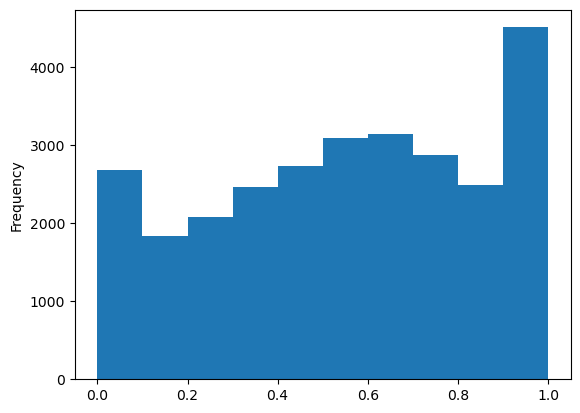

In [69]:
final_df["perc_avl"].plot(kind='hist')

In [70]:
final_df["label"] = (final_df["perc_avl"] > 0.9) * 1
final_df.head()

,id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,beds,price,...,within a day,within a few hours,within an hour,HOUSE,Others,Hotel room,Private room,Shared room,perc_avl,label
0,109,0.0,0.0,1.0,1.0,1.0,1.0,6,3.0,115.0,...,0,0,0,0,1,0,0,0,1.000000,1
1,2708,100.0,100.0,2.0,2.0,1.0,1.0,1,1.0,72.0,...,0,0,1,0,0,0,1,0,0.796117,0
2,2732,90.0,47.0,2.0,2.0,1.0,1.0,1,1.0,155.0,...,0,1,0,0,0,0,1,0,0.451389,0
3,5728,100.0,91.0,8.0,8.0,1.0,1.0,2,1.0,42.0,...,0,1,0,0,1,0,1,0,0.636111,0
4,5729,100.0,91.0,8.0,8.0,1.0,1.0,3,1.0,60.0,...,0,1,0,0,1,0,1,0,0.754167,0


In [71]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [103]:
detect_rate = 0.1

In [104]:
def fdr(classifier, x, y, cutoff=detect_rate):
# Calculates FDR score for the given classifier on dataset x and y with cutoff value
# get the probability list from the given classifier
    return fdr_prob(y, classifier.predict_proba(x), cutoff)
def fdr_prob(y, y_prob, cutoff=detect_rate):
    if len(y_prob.shape) != 1:    # sometimes the proba list can contain many columns, one for each category
        y_prob = y_prob[:, -1:]   # only the last one (fraud_label==1) is used here.
    num_fraud = len(y[y == 1])    # count the total nunber of frauds   
# sort the proba list from high to low while retain the true (not predicted) fraud label
    sorted_prob = np.asarray(sorted(zip(y_prob, y), key=lambda x: x[0], reverse=True))
    cutoff_bin = sorted_prob[0:int(len(y) * cutoff), 1:]  # 3% cutoff
# return the FDR score (#fraud_in_cutoff / #total_fraud)
    return len(cutoff_bin[cutoff_bin == 1]) / num_fraud

In [105]:
num_wrapper = 20

In [106]:
x = final_df.drop(["id","perc_avl","label","year","month"],axis=1).values
cols = final_df.drop(["id","perc_avl","label","year","month"],axis=1).columns
y = final_df["label"].values
x_train, x_test, y_train, y_test = \
    train_test_split(x, y,
                     test_size=0.3,
                     random_state=2)

In [107]:
%%time
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
# If you're doing forward selection it's enough to stop at num_wrapper variables. 
# If you're doing backward selection you need to go through all the variables to get a sorted list of num_wrapper variables.

# I can't figure out how to get rid of this annoying warning! I don't know what I'm doing wrong...

nfeatures = final_df.shape[1] - 5
# clf = RandomForestClassifier() # simple, fast nonlinear model for the wrapper
clf = LGBMClassifier(n_estimators=31,num_leaves=3) # simple, fast nonlinear model for the wrapper
sfs = SFS(clf,k_features=num_wrapper,forward=True,verbose=2,scoring=fdr,cv=3,n_jobs=-1) # use for forward selection
# sfs = SFS(clf,k_features=1,forward=False,verbose=0,scoring=fdr,cv=3,n_jobs=-1) # use for backward selection
sfs.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/var/folders/lx/wx3109f56_50_r0_22hgbcjr0000gn/T/ipykernel_62360/2024397477.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/var/folders/lx/wx3109f56_50_r0_22hgbcjr0000gn/T/ipykernel_62360/2024397477.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/var/folders/lx/wx3109f56_50_r0_22hgbcjr0000gn/T/ipykernel_62360/2024397477.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

CPU times: user 5.06 s, sys: 497 ms, total: 5.56 s
Wall time: 1min 5s


/var/folders/lx/wx3109f56_50_r0_22hgbcjr0000gn/T/ipykernel_62360/2024397477.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/var/folders/lx/wx3109f56_50_r0_22hgbcjr0000gn/T/ipykernel_62360/2024397477.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/var/folders/lx/wx3109f56_50_r0_22hgbcjr0000gn/T/ipykernel_62360/2024397477.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must spe

SequentialFeatureSelector(cv=3,
                          estimator=LGBMClassifier(n_estimators=31,
                                                   num_leaves=3),
                          k_features=(20, 20), n_jobs=-1,
                          scoring=<function fdr at 0x7fad91756670>, verbose=2)

In [108]:
vars_FS = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
vars_FS

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.3266090297790586, 0.3285302593659942, 0.336...",0.330559,"(1,)",0.009677,0.0043,0.003041
2,"(1, 45)","[0.4092219020172911, 0.4169068203650336, 0.419...",0.41512,"(1, 45)",0.009625,0.004277,0.003024
3,"(0, 1, 45)","[0.4322766570605187, 0.44668587896253603, 0.44...",0.439782,"(0, 1, 45)",0.013272,0.005898,0.00417
4,"(0, 1, 8, 45)","[0.4495677233429395, 0.4495677233429395, 0.454...",0.451314,"(0, 1, 8, 45)",0.005559,0.00247,0.001747
5,"(0, 1, 8, 45, 46)","[0.4543707973102786, 0.4610951008645533, 0.461...",0.459001,"(0, 1, 8, 45, 46)",0.00738,0.003279,0.002319
6,"(0, 1, 8, 25, 45, 46)","[0.4601344860710855, 0.4601344860710855, 0.461...",0.460602,"(0, 1, 8, 25, 45, 46)",0.001489,0.000662,0.000468
7,"(0, 1, 2, 8, 25, 45, 46)","[0.46397694524495675, 0.46397694524495675, 0.4...",0.463164,"(0, 1, 2, 8, 25, 45, 46)",0.002587,0.00115,0.000813
8,"(0, 1, 2, 3, 8, 25, 45, 46)","[0.46397694524495675, 0.46397694524495675, 0.4...",0.463164,"(0, 1, 2, 3, 8, 25, 45, 46)",0.002587,0.00115,0.000813
9,"(0, 1, 2, 3, 4, 8, 25, 45, 46)","[0.46397694524495675, 0.46397694524495675, 0.4...",0.463164,"(0, 1, 2, 3, 4, 8, 25, 45, 46)",0.002587,0.00115,0.000813
10,"(0, 1, 2, 3, 4, 8, 25, 40, 45, 46)","[0.4601344860710855, 0.4678194044188281, 0.472...",0.46669,"(0, 1, 2, 3, 4, 8, 25, 40, 45, 46)",0.011153,0.004956,0.003504


In [129]:
ordered_list = []
for i in vars_FS["feature_idx"]:
    temp = list(set(i).difference(set(ordered_list)))[0]
    ordered_list.append(temp)
print(ordered_list)


[1, 45, 0, 8, 46, 25, 2, 3, 4, 40, 5, 6, 7, 9, 19, 20, 21, 22, 23, 24]


In [146]:
for i in ordered_list[0:10]:
    print(cols[i],final_df.loc[final_df["label"] == 1,cols[i]].mean())

host_acceptance_rate 34.45818505338078
avg_rating_host 71.5702846975089
host_response_rate 28.32918149466192
price 141.93638790035587
a few days or more 0.014902135231316727
host_ver_jumio 0.46152135231316727
host_listings_count 9.124110320284698
host_total_listings_count 9.124110320284698
host_has_profile_pic 0.9875444839857651
host_ver_reviews 0.7313167259786477
